<a href="https://colab.research.google.com/github/ctg123/ml-projects/blob/main/customer-service-analysis/customer_service_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Service Requests Analysis

## Problem Statement

Analyze the data on service request (311) call from New York City. Utilize Data Wrangling techniques to understand the patterns in the data and visualize the major type of complaints.

## Import the libraries for analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

## Understanding the dataset

In [ ]:
# checking the info about the installed pandas package version
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.11.1.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.5.3
numpy            : 1.23.5
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : None
pip              : None
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.11.0
pandas_datareader: None
bs4              : 4.11.2
bottleneck       : None
brotli  

In [ ]:
# Setting the constants to use throughout the notebook
DATA_PATH = "data/"
DATASETS_PATH = "datasets/"

In [ ]:
df = pd.read_csv(DATASETS_PATH + "311_Service_Requests_from_2010_to_Present.csv")

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
# Let's get the info about the dataset, shape of the dimensions
df.info()
print("\n")
print( f"The shape of the dataset is {df.shape}")
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [ ]:
# Let's check if any null values exists
null_counts = df.isnull().sum()
print(null_counts)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

**Observations:**

>There are null values present in the **`df`** dataframe for the following variables:

    1. Closed Date
    2. Descriptor
    3. Location Type
    etc...


## Exploratory Data Analysis(EDA)

we use `plt.style.use('ggplot')` to set the ggplot style for Matplotlib. We then use the same code as before to count the null values and create the bar chart, and set the chart title and axis labels using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`.

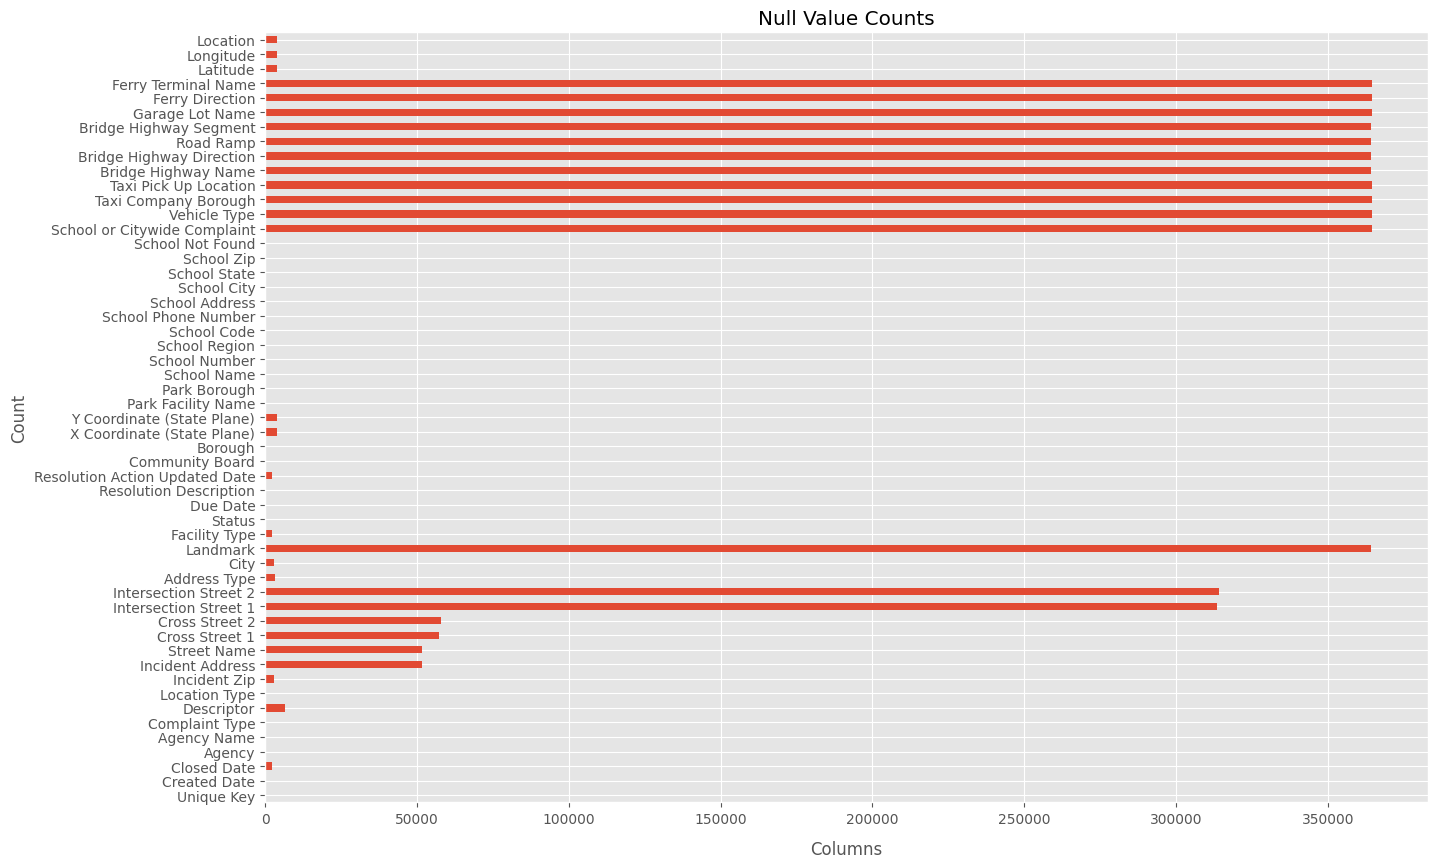

In [ ]:
plt.style.use('ggplot')

# Create bar chart of null value counts
null_counts.plot.barh(figsize=(15,10), stacked=True)

# Set chart title and axis labels
plt.title('Null Value Counts')
plt.xlabel('Columns', labelpad=10)
plt.ylabel('Count')

# Show chart
plt.show()

In [ ]:
# Remove null values from "Closed Date" column
df.dropna(subset=["Closed Date"], inplace=True)

# Show sample of dataset with null values removed
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
# Check if null values are still present in "Closed Date" column
if df['Closed Date'].isnull().any():
    print('Null values still present in "Closed Date" column.')
else:
    print('No null values present in "Closed Date" column.')


No null values present in "Closed Date" column.


In [ ]:
# Convert the "Closed Date" and "Created Date" columns to datetime format
df["Created Date"] = pd.to_datetime(df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
df["Closed Date"] = pd.to_datetime(df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      362177 non-null  int64         
 1   Created Date                    362177 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          362177 non-null  object        
 4   Agency Name                     362177 non-null  object        
 5   Complaint Type                  362177 non-null  object        
 6   Descriptor                      355681 non-null  object        
 7   Location Type                   362047 non-null  object        
 8   Incident Zip                    361502 non-null  float64       
 9   Incident Address                310491 non-null  object        
 10  Street Name                     310491 non-null  object 

In [ ]:
# Create a new column called "Time Delta" and calculate the time delta between "Closed Date" and "Created Date"
df["request_closing_time_sec"] = (df["Closed Date"] - df["Created Date"]).dt.total_seconds()

# View descriptive statistics of the "Time Delta" column
df["request_closing_time_sec"].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: request_closing_time_sec, dtype: float64

## Finding the major type of complaints

In [ ]:
# Check the number of null values in the "Complaint_Type" and "City" columns using f-strings
print(f'Number of null values in "Complaint_Type" column: {df["Complaint Type"].isnull().sum()}')
print(f'Number of null values in "City" column: {df["City"].isnull().sum()}')

Number of null values in "Complaint_Type" column: 0
Number of null values in "City" column: 674


In [ ]:
# fill in missing values (nan) in the 'City' column with 'Unknown City'
df['City'].fillna('Unknown City', inplace=True)

# Get Unique Count using Series.unique()
city_count = df.City.unique().size

# Let's check what all unique values are in the 'City' column
city_col = df['City'].unique()

print(f"There are {city_count} values in the dataset that contain the following info: \n {city_col}")

There are 54 values in the dataset that contain the following info: 
 ['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' 'Unknown City' 'RIDGEWOOD' 'HOWARD BEACH'
 'FOREST HILLS' 'STATEN ISLAND' 'OZONE PARK' 'RICHMOND HILL' 'WOODHAVEN'
 'FLUSHING' 'CORONA' 'QUEENS VILLAGE' 'OAKLAND GARDENS' 'HOLLIS' 'MASPETH'
 'EAST ELMHURST' 'SOUTH OZONE PARK' 'WOODSIDE' 'FRESH MEADOWS'
 'LONG ISLAND CITY' 'ROCKAWAY PARK' 'SPRINGFIELD GARDENS' 'COLLEGE POINT'
 'BAYSIDE' 'GLEN OAKS' 'FAR ROCKAWAY' 'BELLEROSE' 'LITTLE NECK'
 'CAMBRIA HEIGHTS' 'ROSEDALE' 'SUNNYSIDE' 'WHITESTONE' 'ARVERNE'
 'FLORAL PARK' 'NEW HYDE PARK' 'CENTRAL PARK' 'BREEZY POINT' 'QUEENS'
 'Astoria' 'Long Island City' 'Woodside' 'East Elmhurst' 'Howard Beach']


In [ ]:
total_city_complaints = df.groupby(['City','Complaint Type']).size().unstack().fillna(0)

total_city_complaints.head()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.0,46.0,0.0,0.0,50.0,32.0,2.0,1.0,1.0,4.0,...,14.0,2.0,29.0,10.0,1.0,0.0,0.0,1.0,1.0,1.0
ASTORIA,0.0,170.0,0.0,16.0,3436.0,426.0,5.0,43.0,4.0,32.0,...,21.0,64.0,409.0,236.0,2.0,3.0,0.0,60.0,10.0,57.0
Astoria,0.0,0.0,0.0,0.0,159.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAYSIDE,0.0,53.0,0.0,0.0,514.0,231.0,2.0,1.0,3.0,2.0,...,3.0,4.0,17.0,24.0,0.0,0.0,0.0,9.0,0.0,2.0
BELLEROSE,0.0,15.0,0.0,1.0,138.0,120.0,2.0,1.0,0.0,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,0.0,9.0,1.0,0.0


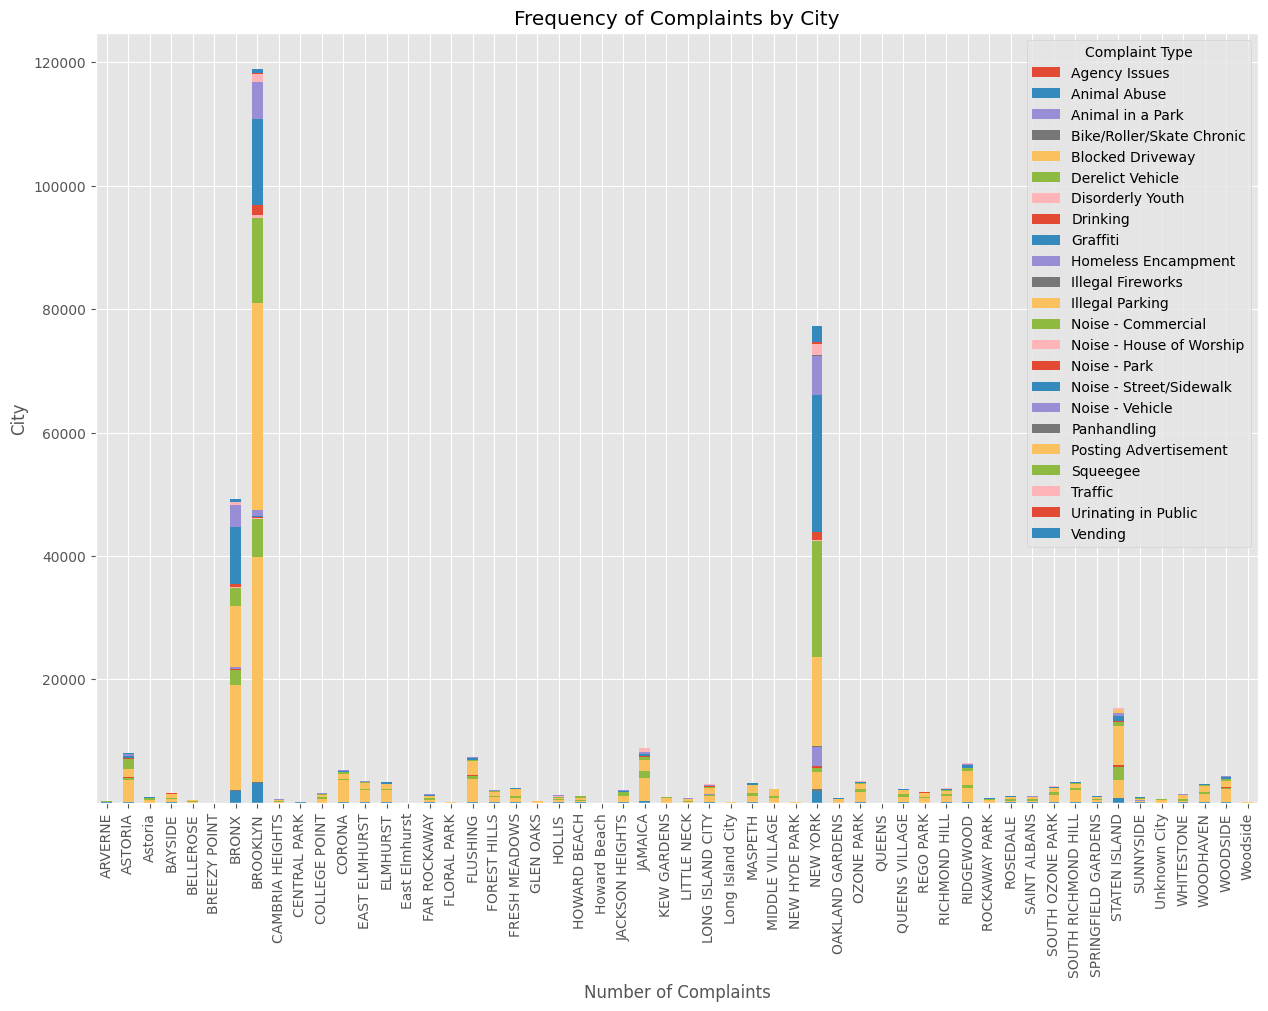

In [ ]:
total_city_complaints.plot.bar(figsize=(15,10), stacked=True)

# set the axis labels and title
plt.xlabel('Number of Complaints')
plt.ylabel('City')
plt.title('Frequency of Complaints by City')

# show the plot
plt.show()

## Data Visualization of the major type of complaints

In order to find the major type of complaints in the dataset, the following code groups the dataset by complaint type, counts the number of occurrences for each type, and then sorts the counts in descending order. The resulting bar graph shows the counts for each complaint type.

In [ ]:
# Group by complaint type and count the number of occurrences
complaint_counts = df.groupby('Complaint Type').size().reset_index(name='counts')

# Sort the counts in descending order
complaint_counts = complaint_counts.sort_values('counts', ascending=False)

complaint_counts

,Complaint Type,counts
4,Blocked Driveway,100624
11,Illegal Parking,91716
15,Noise - Street/Sidewalk,51139
12,Noise - Commercial,43751
5,Derelict Vehicle,21518
16,Noise - Vehicle,19301
1,Animal Abuse,10530
20,Traffic,5196
9,Homeless Encampment,4879
22,Vending,4185


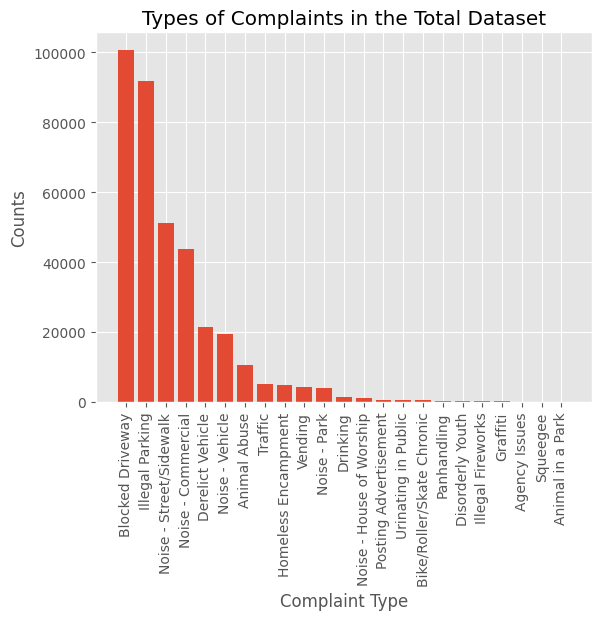

In [ ]:
# Plot the bar graph
plt.bar(complaint_counts['Complaint Type'], complaint_counts['counts'])
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Counts')
plt.title('Types of Complaints in the Total Dataset')
plt.show()

From our bar chart analysis, the top 10 major complaint types are the following:

1. `Blocked Driveway`
2. `Illegal Parking`
3. `Noisy Street/Sidewalk`
4. `Noise - Commerical buildings`
5. `Derelict Vehicle`
6. `Noise - Vehicle`
7. `Animal Abuse`
8. `Traffic`
9. `Homeless Encampment`
10. `Vending`

Let's explore the complaint data specifically for NYC ...

This code filters the dataset to only include complaints from New York City, groups the remaining data by complaint type, counts the number of occurrences for each type, and then sorts the counts in descending order. The resulting output shows the frequency of each complaint type for New York City.

In [ ]:
nyc_data = df.loc[df['City'] == 'NEW YORK']
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,request_closing_time_sec
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",7102.0
19,32308195,2015-12-31 23:40:55,2016-01-01 00:28:31,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10026.0,264 WEST 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.805267,-73.953353,"(40.80526715877265, -73.9533526205901)",2856.0
23,32308765,2015-12-31 23:32:46,2016-01-01 00:25:21,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10030.0,133 WEST 134 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.814002,-73.942664,"(40.814001537165495, -73.94266395083876)",3155.0
26,32305916,2015-12-31 23:26:41,2015-12-31 23:53:31,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,10031.0,452 WEST 147 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.826102,-73.945663,"(40.826101709196, -73.94566339279595)",1610.0


In [ ]:
# Extract and count the unique values in the "Complaint Type" column
nyc_complaint_types = len(nyc_data['Complaint Type'].unique())

# Print the complaint types
print(f"there are {nyc_complaint_types} complaint types in New York City.")

# Group by complaint type and count the number of occurrences
nyc_complaint_counts = nyc_data.groupby('Complaint Type').size().reset_index(name='counts')

# Sort the counts in descending order
nyc_complaint_counts = nyc_complaint_counts.sort_values('counts', ascending=False)

nyc_data['Complaint Type'].value_counts()

there are 21 complaint types in New York City.


Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

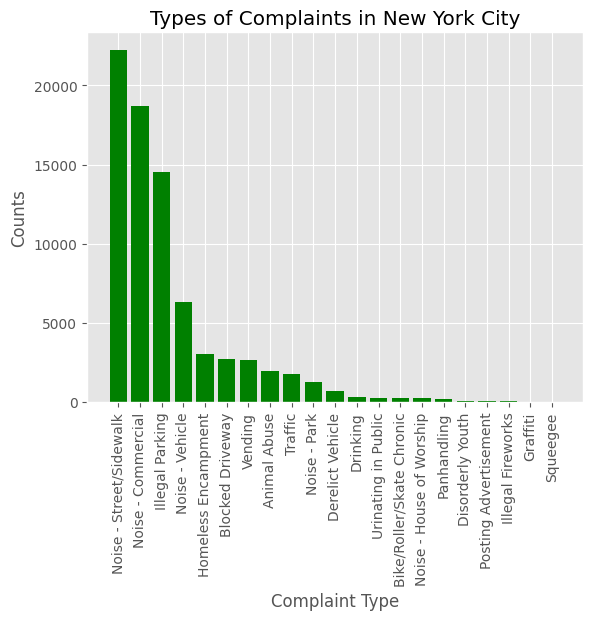

In [ ]:
# Plot the bar graph
plt.bar(nyc_complaint_counts['Complaint Type'], nyc_complaint_counts['counts'], color='green')
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Counts')
plt.title('Types of Complaints in New York City')
plt.show()

Let's explore the complaint data specifically for Brooklyn ...

This code filters the dataset to only include complaints from Brooklyn, groups the remaining data by complaint type, counts the number of occurrences for each type, and then sorts the counts in descending order. The resulting output shows the frequency of each complaint type for Brooklyn.

In [ ]:
bk_data = df.loc[df['City'] == 'BROOKLYN']
bk_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,request_closing_time_sec
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",6821.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",5022.0
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",30649.0
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",3078.0
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",10589.0


In [ ]:
# Extract and count the unique values in the "Complaint Type" column
bk_complaint_types = len(bk_data['Complaint Type'].unique())

# Print the complaint types
print(f"there are {bk_complaint_types} complaint types in Brooklyn.")

# Group by complaint type and count the number of occurrences
bk_complaint_counts = bk_data.groupby('Complaint Type').size().reset_index(name='counts')

# Sort the counts in descending order
bk_complaint_counts = bk_complaint_counts.sort_values('counts', ascending=False)

bk_data['Complaint Type'].value_counts()

there are 20 complaint types in Brooklyn.


Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint Type, dtype: int64

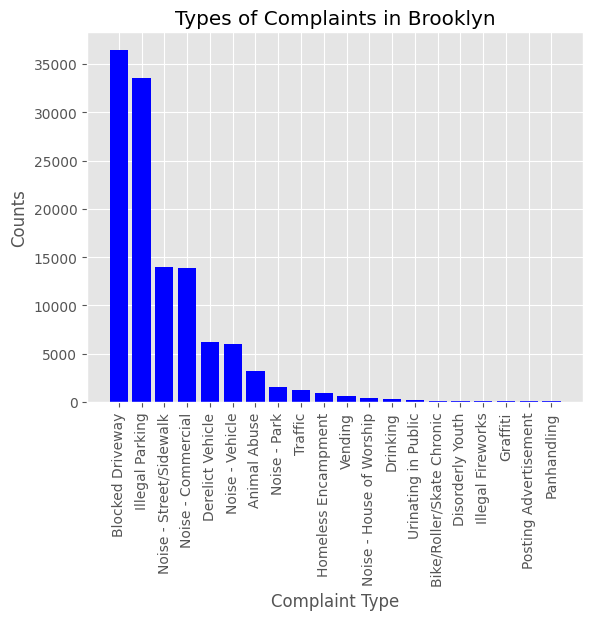

In [ ]:
# Plot the bar graph
plt.bar(bk_complaint_counts['Complaint Type'], bk_complaint_counts['counts'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Counts')
plt.title('Types of Complaints in Brooklyn')
plt.show()

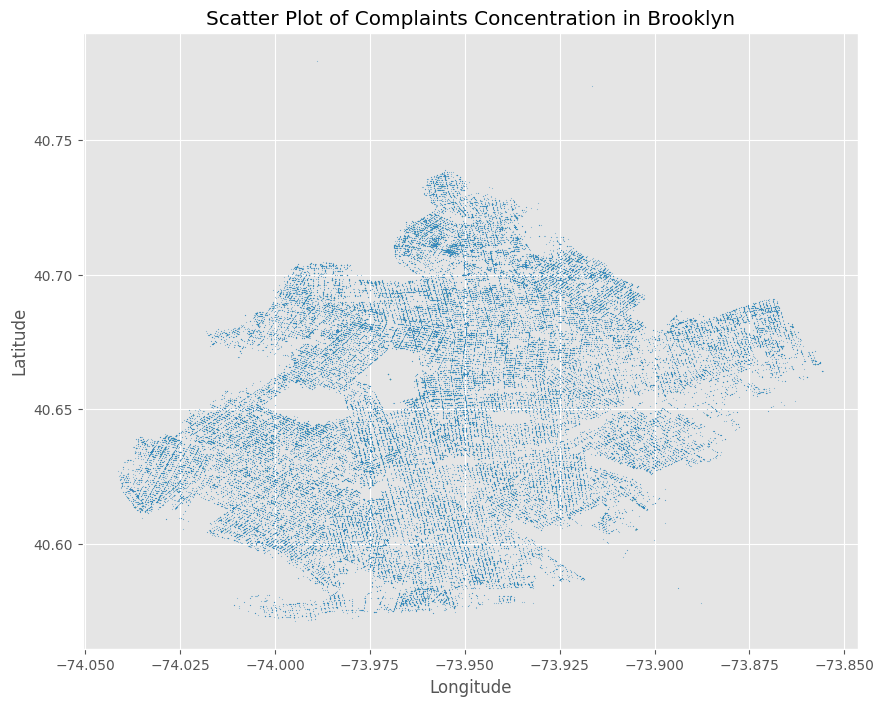

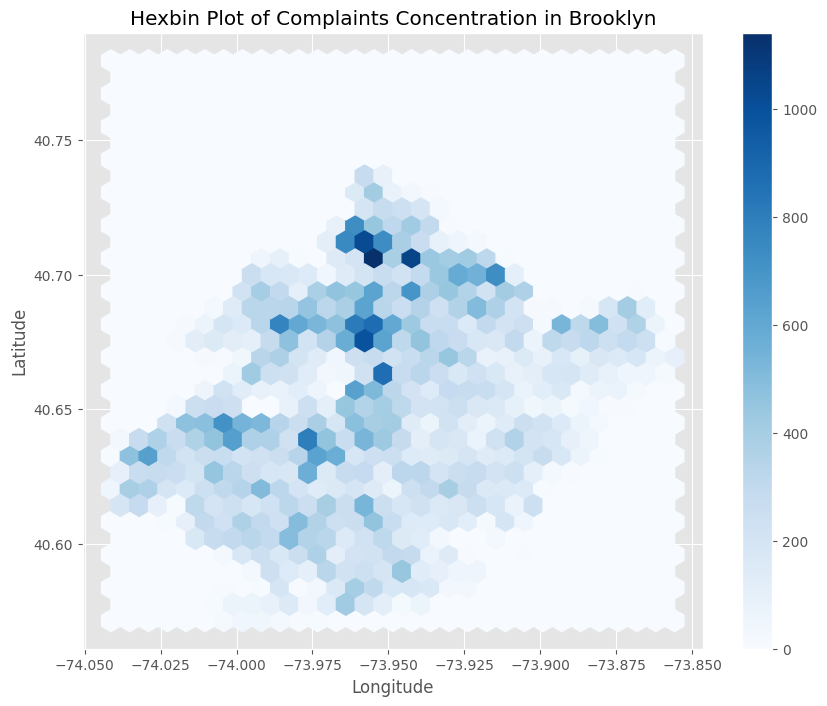

In [ ]:
# create a scatter plot of the concentration of complaints across Brooklyn
bk_data.plot.scatter(x='Longitude', y='Latitude', s=0.1, alpha=0.5, figsize=(10, 8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Complaints Concentration in Brooklyn')

# create a hexbin plot of the concentration of complaints across Brooklyn
bk_data.plot.hexbin(x='Longitude', y='Latitude', gridsize=30, cmap='Blues', figsize=(10, 8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Complaints Concentration in Brooklyn')

# show the plots
plt.show()

This code groups the data by both city and complaint type, counts the number of occurrences for each combination, and then prints the resulting output, which shows the various types of complaints in each city.

In [ ]:
# Group by city and complaint type and count the number of occurrences
complaints_by_city = df.groupby(['City', 'Complaint Type']).size().reset_index(name='counts')

# Print the various types of complaints in each city
complaints_by_city

,City,Complaint Type,counts
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
787,Woodside,Blocked Driveway,27
788,Woodside,Derelict Vehicle,8
789,Woodside,Illegal Parking,124
790,Woodside,Noise - Commercial,2


This code uses the `pd.pivot_table()` function to pivot the data in the original DataFrame df. The resulting DataFrame, `df_new`, has complaint types as rows, cities as columns, and the count of occurrences as the values. The fill_value=0 parameter fills any missing values with zeros. The resulting output shows the new DataFrame with cities as columns and complaint types in rows.

In [ ]:
# Pivot the data to create a new DataFrame
df_new = pd.pivot_table(df, index='Complaint Type', columns='City', aggfunc=len, fill_value=0)

# Print the new DataFrame
df_new.head()

Address Type                                    \
City                           ARVERNE ASTORIA Astoria BAYSIDE BELLEROSE   
Complaint Type                                                             
Agency Issues                        0       0       0       0         0   
Animal Abuse                        46     170       0      53        15   
Animal in a Park                     0       0       0       0         0   
Bike/Roller/Skate Chronic            0      16       0       0         1   
Blocked Driveway                    50    3436     159     514       138   

                                                                        \
City                      BREEZY POINT  BRONX BROOKLYN CAMBRIA HEIGHTS   
Complaint Type                                                           
Agency Issues                        0      0        0               0   
Animal Abuse                         2   1971     3191              15   
Animal in a Park                     0      0        0               0   
Bike/Roller/Skate Chronic            0     22      124               0   
Blocked Driveway                     3  17062    36445             177   

                                        ... request_closing_time_sec  \
City                      CENTRAL PARK  ...         SOUTH OZONE PARK   
Complaint Type                          ...                            
Agency Issues                        0  ...                        0   
Animal Abuse                         0  ...                       74   
Animal in a Park                     0  ...                        0   
Bike/Roller/Skate Chronic            0  ...                        1   
Blocked Driveway                     0  ...                     1202   

                                                                   \
City                      SOUTH RICHMOND HILL SPRINGFIELD GARDENS   
Complaint Type                                                      
Agency Issues                               0                   0   
Animal Abuse                               40                  42   
Animal in a Park                            0                   0   
Bike/Roller/Skate Chronic                   1                   0   
Blocked Driveway                         1946                 330   

                                                                           \
City                      STATEN ISLAND SUNNYSIDE Unknown City WHITESTONE   
Complaint Type                                                              
Agency Issues                         0         0            8          0   
Animal Abuse                        786        40            1         43   
Animal in a Park                      0         0            0          0   
Bike/Roller/Skate Chronic            10         2            2          4   
Blocked Driveway                   2845       278           86        279   

                                                       
City                      WOODHAVEN WOODSIDE Woodside  
Complaint Type                                         
Agency Issues                     0        0        0  
Animal Abuse                     57      111        0  
Animal in a Park                  0        0        0  
Bike/Roller/Skate Chronic         2        5        0  
Blocked Driveway               1363     2038       27  

[5 rows x 2808 columns]

In [ ]:
# Pivot table to get counts of complaint types for each city
complaints_by_city = pd.pivot_table(data=df, index='Complaint Type', columns='City', aggfunc='size', fill_value=0)

complaints_by_city.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27


In [ ]:
# Plot the pivot table as a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(data=complaints_by_city, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('City', fontsize=16)
plt.ylabel('Complaint Type Count', fontsize=16)
plt.title('Complaint Types in Each City', fontsize=20)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## Statistical Analysis of `Request_Closing_Time`

In [ ]:
# Calculating the response time in hrs and min.

df['request_closing_time_hrs'] = df['Closed Date'].values - df['Created Date'].values
df['request_closing_time_min'] = df['request_closing_time_hrs']/np.timedelta64(1,'m')

df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,request_closing_time_sec,request_closing_time_hrs,request_closing_time_min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0,0 days 00:55:30,55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0,0 days 01:27:13,87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0,0 days 04:51:34,291.566667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0,0 days 07:45:27,465.450000
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0,0 days 03:27:44,207.733333


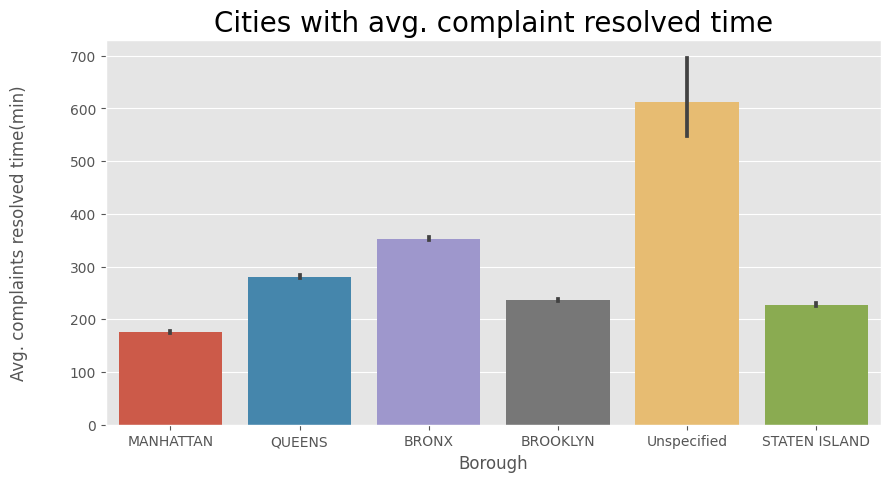

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Borough',y='request_closing_time_min',data=df)
plt.title("Cities with avg. complaint resolved time", fontsize=20)
plt.xlabel("Borough")
plt.ylabel("Avg. complaints resolved time(min)", labelpad=30)
plt.show()

In [ ]:
# Calculate the average closing time by city
avg_closing_time_per_city = df.groupby('City')['request_closing_time_min'].mean().sort_values()

avg_closing_time_per_city

City
ARVERNE                137.840605
ROCKAWAY PARK          139.602908
LITTLE NECK            155.031437
OAKLAND GARDENS        156.240167
BAYSIDE                160.062978
FAR ROCKAWAY           161.193068
NEW YORK               175.343723
FLUSHING               177.446478
FOREST HILLS           184.097636
WHITESTONE             187.976467
CORONA                 188.984584
COLLEGE POINT          190.393782
JACKSON HEIGHTS        190.885368
ELMHURST               194.108392
FRESH MEADOWS          200.741045
REGO PARK              202.462138
BREEZY POINT           205.197849
EAST ELMHURST          206.801481
CENTRAL PARK           206.921364
STATEN ISLAND          228.038305
BROOKLYN               236.607935
Howard Beach           241.750000
Astoria                242.452302
Long Island City       245.388922
ASTORIA                265.236501
RIDGEWOOD              268.285547
SAINT ALBANS           271.040767
East Elmhurst          273.630556
Woodside               281.455622
KEW GARDE

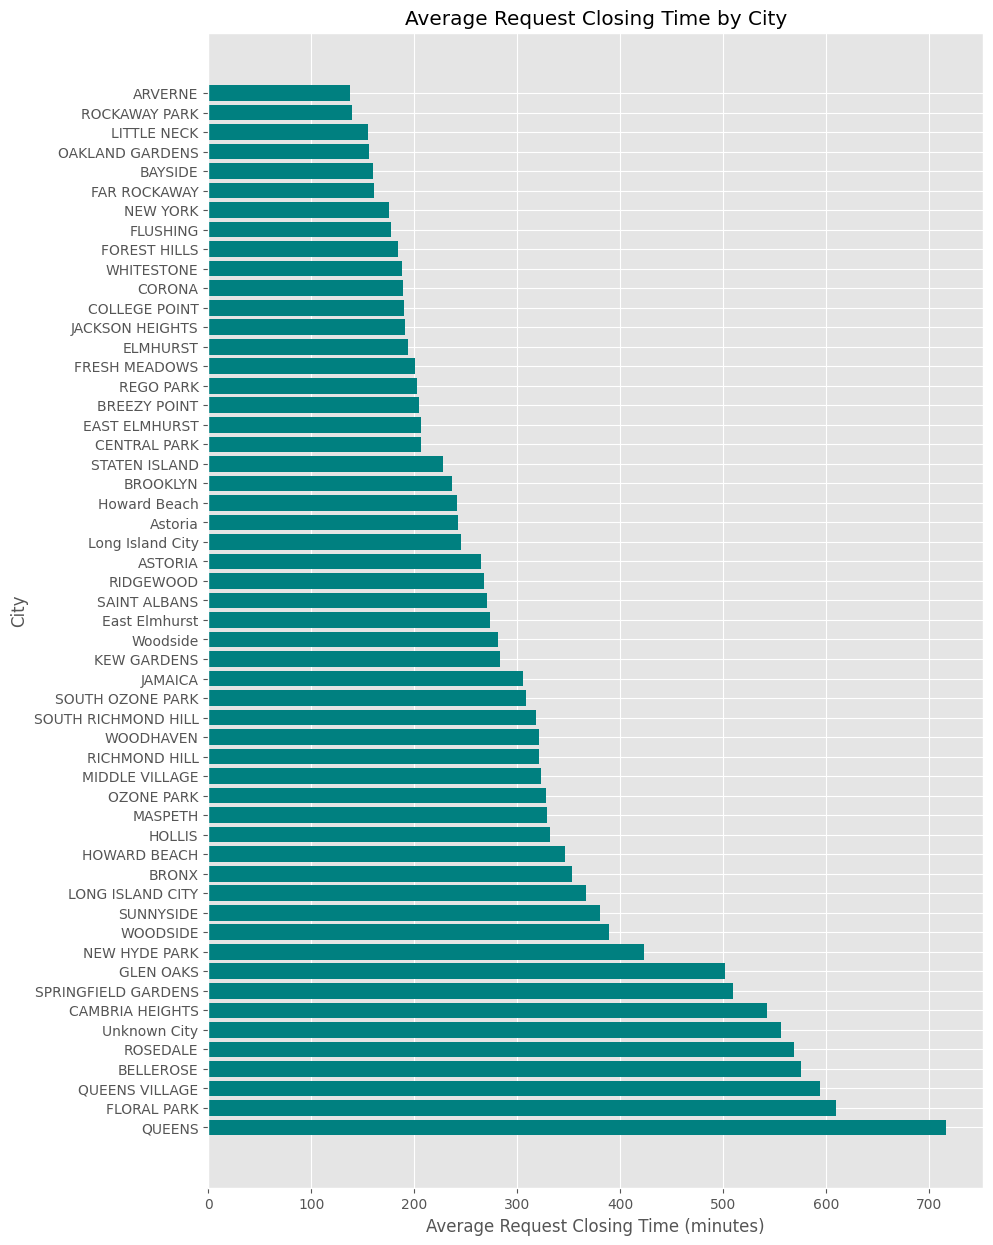

In [ ]:
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(avg_closing_time_per_city.index, avg_closing_time_per_city.values, color='teal')

# Set the title and axis labels
ax.set_title('Average Request Closing Time by City')
#ax.set_xlabel('Time Delta (seconds)')
ax.set_xlabel('Average Request Closing Time (minutes)')
ax.set_ylabel('City')

# Invert the y-axis to show the cities with the highest closing times at the top
ax.invert_yaxis()

# Display the plot
plt.show()

Let's see the avg. response time across different types of complaints. We will also compare them across each borough.

In [ ]:
# Calculate the average closing time by complaint type
avg_closing_time_per_complaint = df.groupby('Complaint Type')['request_closing_time_min'].mean().sort_values()

avg_closing_time_per_complaint

Complaint Type
Posting Advertisement          121.437604
Illegal Fireworks              168.558043
Noise - Commercial             184.762676
Noise - House of Worship       189.851451
Noise - Park                   203.767592
Noise - Street/Sidewalk        203.854924
Traffic                        205.152002
Disorderly Youth               206.062487
Noise - Vehicle                209.363334
Urinating in Public            215.988222
Bike/Roller/Skate Chronic      218.728140
Drinking                       230.355009
Vending                        239.437973
Squeegee                       242.670833
Homeless Encampment            257.523075
Illegal Parking                260.840595
Panhandling                    264.225846
Blocked Driveway               270.542025
Animal Abuse                   300.542601
Agency Issues                  304.818750
Graffiti                       387.939066
Derelict Vehicle               422.660002
Animal in a Park             20210.566667
Name: request_closi

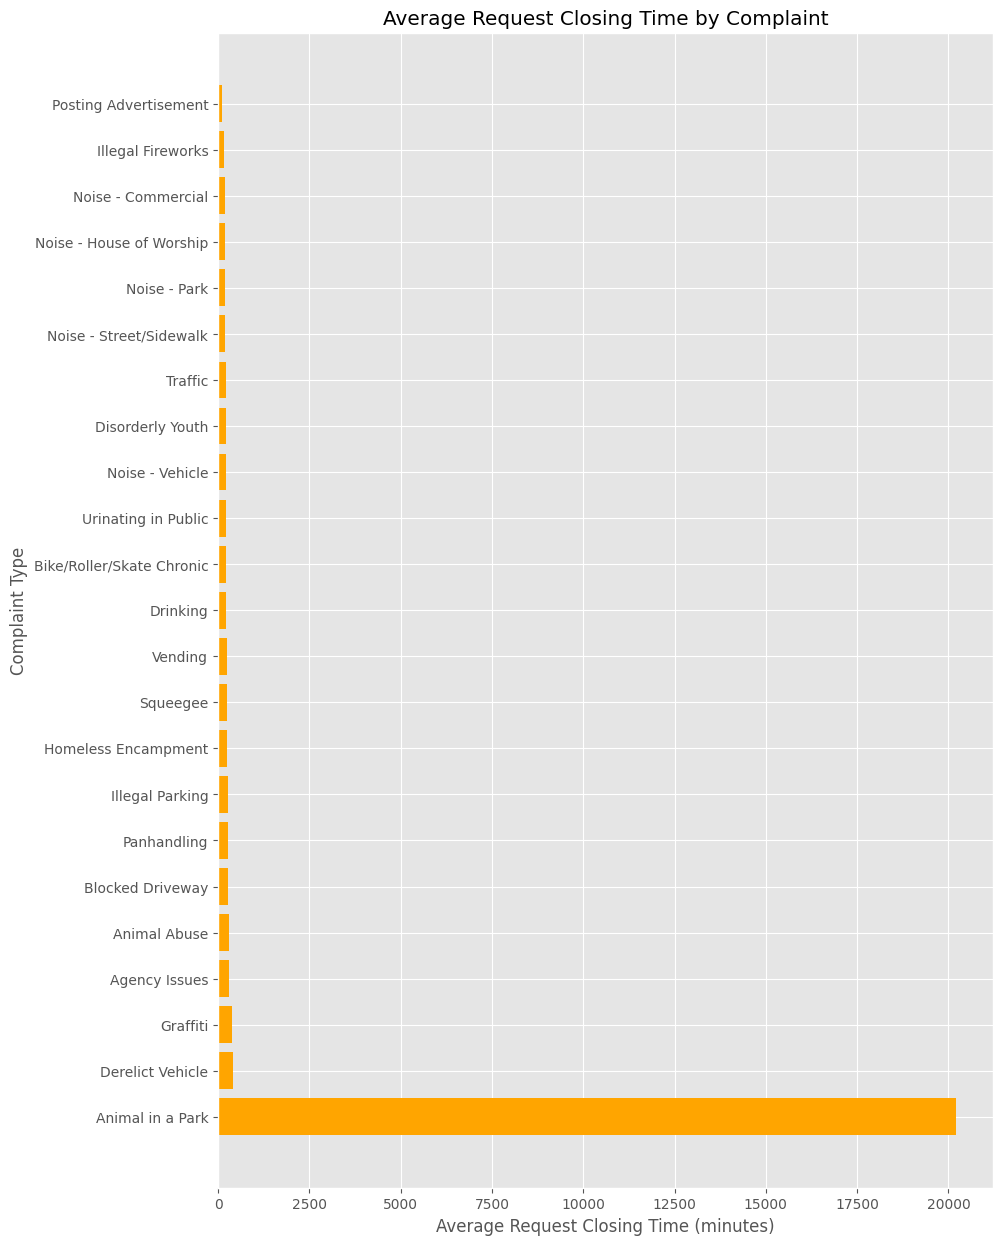

In [ ]:
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(avg_closing_time_per_complaint.index, avg_closing_time_per_complaint.values, color='orange')

# Set the title and axis labels
ax.set_title('Average Request Closing Time by Complaint')
#ax.set_xlabel('Time Delta (seconds)')
ax.set_xlabel('Average Request Closing Time (minutes)')
ax.set_ylabel('Complaint Type')

# Invert the y-axis to show the cities with the highest closing times at the top
ax.invert_yaxis()

# Display the plot
plt.show()

Here you can see that the `Animal in a Park` takes almost approximately 2 weeks to resolve. Other complaint types are more frequent where `Posting Advertisement` took the fewest amount of time and `Derelict Vehicle` is responded slower than others.

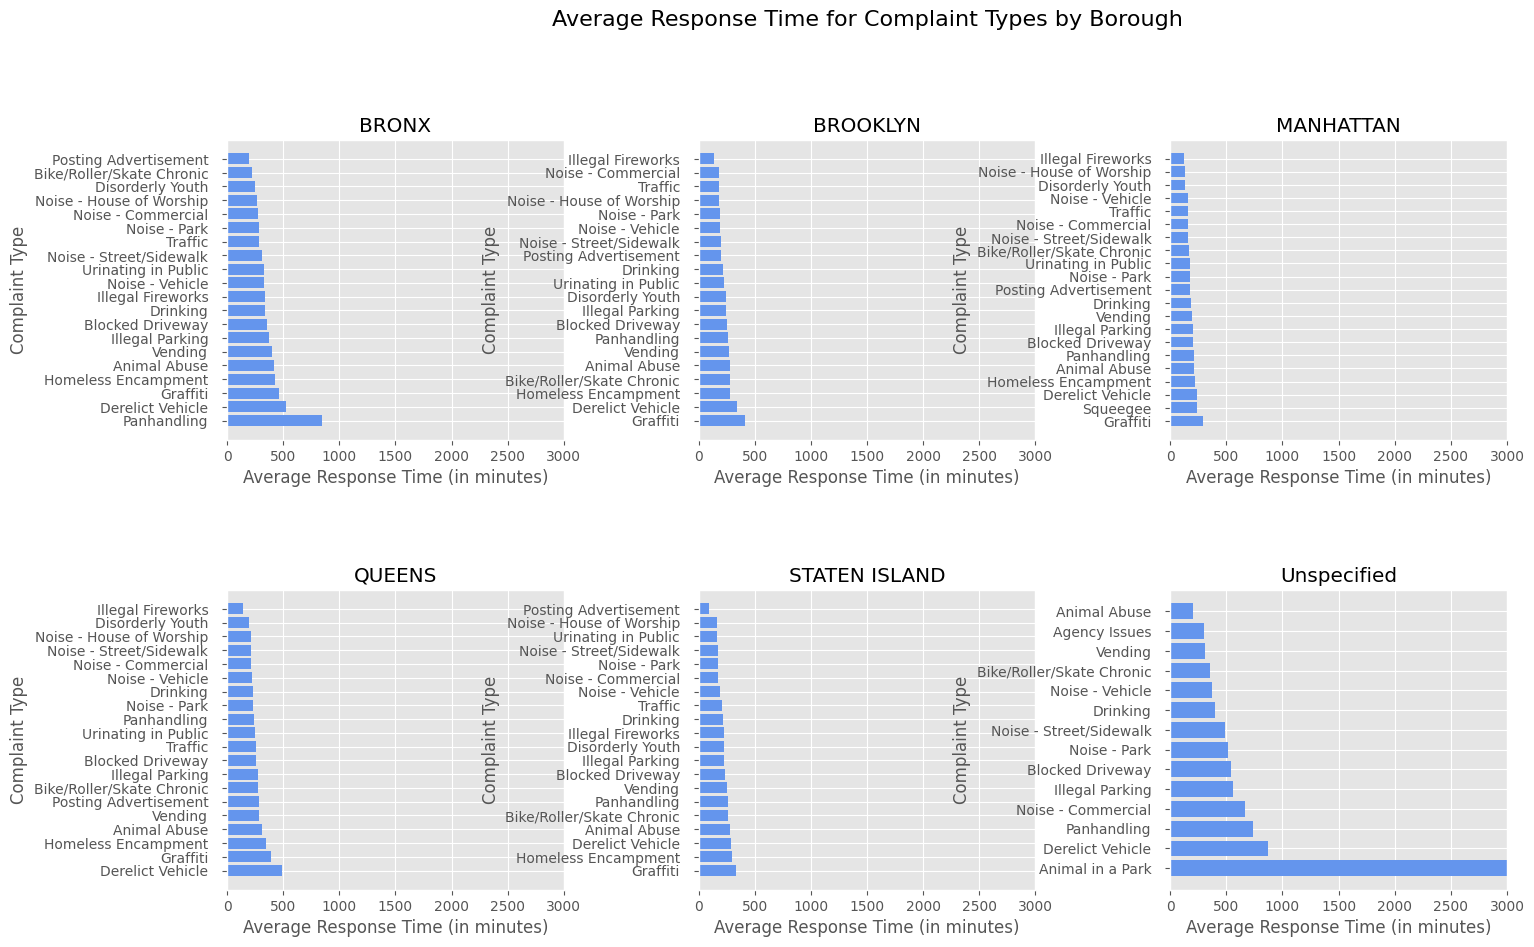

In [ ]:
# Create a list of boroughs
boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'Unspecified']

# Create a figure with 5 subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Set the title of the figure
fig.suptitle('Average Response Time for Complaint Types by Borough', fontsize=16)

# Loop through each borough and create a subplot
for i, borough in enumerate(boroughs):
    # Calculate the average response time for each complaint type in the current borough
    borough_df = df[df['Borough'] == borough].groupby('Complaint Type')['request_closing_time_min'].mean().sort_values(ascending=False)

    # Create a subplot for the current borough
    ax = axs[i//3, i%3]

    # Set the title and x/y axis labels for the subplot
    ax.set_title(borough)
    ax.set_xlabel('Average Response Time (in minutes)')
    ax.set_ylabel('Complaint Type')

    # Create a horizontal bar chart for the average response time for each complaint type in the current borough
    ax.barh(borough_df.index, borough_df.values, color='cornflowerblue')

    # Set the x-axis limits
    ax.set_xlim(0, 3000)

    # Set the y-axis tick labels to be left-aligned
    ax.tick_params(axis='y', which='major', pad=10, left=True)

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.85, wspace=0.4, hspace=0.5)

# Display the plot
plt.show()

### Hypothesis Testing

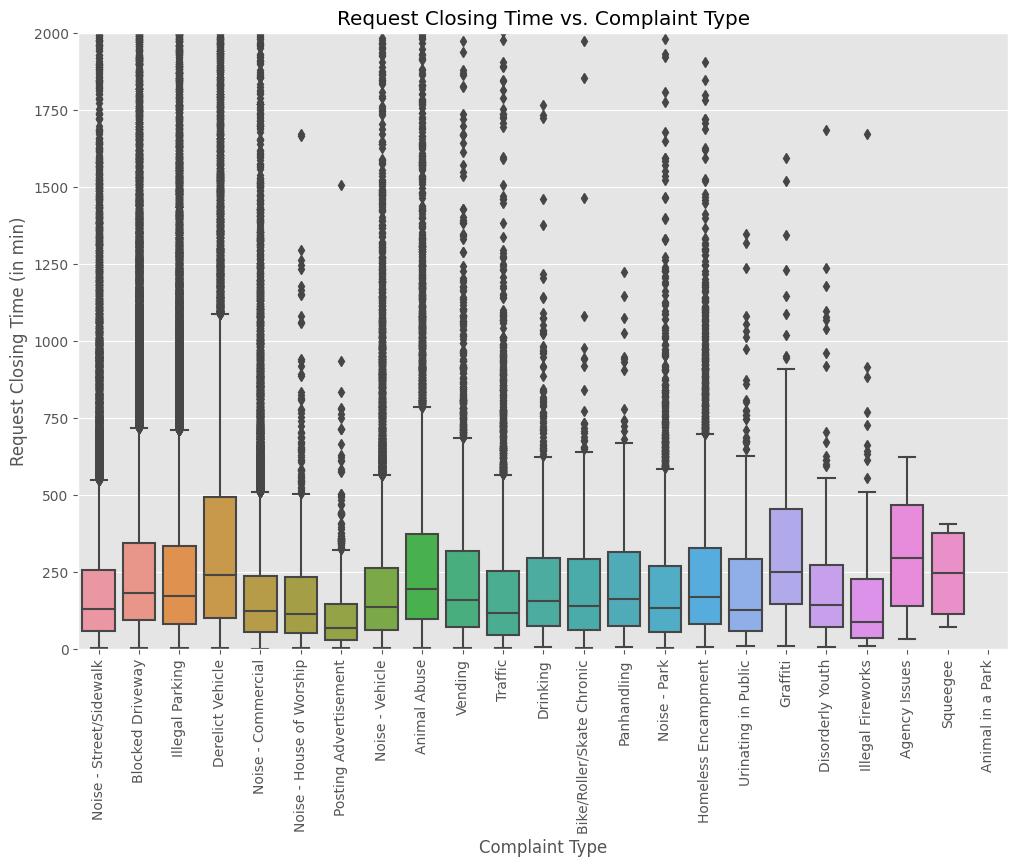

In [ ]:
plt.figure(figsize=(12,8)) # set the size of the plot

bxp = sns.boxplot(x="Complaint Type", y="request_closing_time_min", data=df)

plt.xticks(rotation=90) # rotate x-axis labels for readability
plt.ylim((0,2000))
plt.title('Request Closing Time vs. Complaint Type') # add title
plt.xlabel('Complaint Type') # add x-axis label
plt.ylabel('Request Closing Time (in min)') # add y-axis label

plt.show() # show the plot

Let's identify the relationship between Complaint Type and Request_Closing_Time using p-values.

In [ ]:
import scipy.stats as stats

# Subset the data to only include relevant columns
df_subset = df[['Complaint Type', 'request_closing_time_min']]

# Drop rows with missing values
df_subset.dropna(inplace=True)

# Create a dictionary to store the p-values for each Complaint Type
p_values = {}

# Loop through each Complaint Type and perform a t-test
for complaint_type in df_subset['Complaint Type'].unique():
    subset_data = df_subset[df_subset['Complaint Type'] == complaint_type]
    _, p_value = stats.ttest_ind(subset_data['request_closing_time_min'], df_subset['request_closing_time_min'], equal_var=False)
    p_values[complaint_type] = p_value

# Print the p-values for each Complaint Type
for complaint_type, p_value in p_values.items():
    print(f"{complaint_type}: {p_value}")

Noise - Street/Sidewalk: 1.0418660815085685e-213
Blocked Driveway: 4.019758968383826e-60
Illegal Parking: 1.5138895255889238e-12
Derelict Vehicle: 0.0
Noise - Commercial: 0.0
Noise - House of Worship: 1.936694912503301e-14
Posting Advertisement: 5.705156559333243e-84
Noise - Vehicle: 2.5199177802871667e-98
Animal Abuse: 5.499498875777252e-26
Vending: 0.004485741820533039
Traffic: 9.456336836510554e-30
Drinking: 0.008276021427926881
Bike/Roller/Skate Chronic: 0.003611782707126402
Panhandling: 0.6839990056391407
Noise - Park: 3.112919243953218e-36
Homeless Encampment: 0.2172827818199051
Urinating in Public: 0.0024821888625792565
Graffiti: 0.00036920602249336374
Disorderly Youth: 0.0002219206596024413
Illegal Fireworks: 1.0221564314184692e-06
Agency Issues: 0.521792708186724
Squeegee: 0.9199000703670601
Animal in a Park: nan


we create a contingency table using `pd.crosstab()` to count the number of complaints for each complaint type and city. Then, we use `chi2_contingency()` from the `scipy.stats` library to perform the chi-square test on the contingency table. Finally, we print the results including the chi-square value, p-value, degrees of freedom, and expected values.

The null hypothesis for the chi-square test is that there is no association between the two variables (in this case, Complaint Type and City), while the alternative hypothesis is that there is some association. If the p-value is less than our chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of a significant association between the variables.

In [ ]:
# Import required libraries
from scipy.stats import chi2_contingency

# Create a contingency table
cont_table = pd.crosstab(df['Complaint Type'], df['City'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Set significance level
alpha = 0.05

# Print results
print(f"Chi-square value: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
print("\n")

# Check if p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

Chi-square value: 145971.80461890675
P-value: 0.0
Degrees of freedom: 1166
Expected frequencies:
[[5.72095964e-03 1.76510380e-01 1.99902258e-02 ... 6.85189838e-02
  9.62402361e-02 3.66671545e-03]
 [7.53021313e+00 2.32331788e+02 2.63121347e+01 ... 9.01881124e+01
  1.26676211e+02 4.82631421e+00]
 [7.15119955e-04 2.20637975e-02 2.49877822e-03 ... 8.56487298e-03
  1.20300295e-02 4.58339431e-04]
 ...
 [3.71576329e+00 1.14643492e+02 1.29836516e+01 ... 4.45030800e+01
  6.25080334e+01 2.38153168e+00]
 [4.58391891e-01 1.41428942e+01 1.60171684e+00 ... 5.49008358e+00
  7.71124892e+00 2.93795575e-01]
 [2.99277701e+00 9.23369927e+01 1.04573869e+01 ... 3.58439934e+01
  5.03456735e+01 1.91815052e+00]]


There is no significant difference between the two groups.


## Kruskal-Wallis H Test - One-way ANOVA

the Kruskal-Wallis H Test is a non-parametric test, meaning that it makes no assumptions about the distribution of the data. However, it does assume that the samples are independent and that the variances of the populations are equal.

$$
H_0 : \text{ there is no significant different in mean of Request_Closing_Time for different Complaint}\\
H_1 : \text{there is signficant different in mean of Request_Closing_Time for different Complaint}
$$

In [ ]:
from scipy.stats import kruskal

anova_df = df[['Complaint Type', 'request_closing_time_min']]

anova_df = anova_df.dropna()

anova_df.head()

,Complaint Type,request_closing_time_min
0,Noise - Street/Sidewalk,55.500000
1,Blocked Driveway,87.216667
2,Blocked Driveway,291.566667
3,Illegal Parking,465.450000
4,Illegal Parking,207.733333


In [ ]:
# Create a dictionary to store the data for each complaint type
complaint_types = df['Complaint Type'].unique()
data = {complaint_type: df.loc[df['Complaint Type'] == complaint_type, 'request_closing_time_min'] for complaint_type in complaint_types}

# Perform the Kruskal-Wallis H Test
stat, p = kruskal(*data.values())

# Print the results
print(f"Kruskal-Wallis H Test Results:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

Kruskal-Wallis H Test Results:
Statistic: 11988.2694
P-value: 0.0000


Since the p value for the Complaint is less than 0.01, we accept alternate hypothesis testing (i.e. there's a significant difference in the mean response time of different types of complaints)

## Observations and Outcomes

Here are some of the major conclusions that can be drawn from the `311 Customer service NYC dataset`:
1. The most common complaint types across all boroughs are related to street parking conditions and noise.
2. Brooklyn has the highest number of complaints compared to other boroughs while Queens takes the longest to resolve complaints.
3. The average response time varies depending on the complaint type and borough, with some types and boroughs experiencing longer response times than others.
4. The scatter and hexbin plot of Brooklyn illustrate the relationships between different complaint types and how they are clustered together.
5. The box plot shows that there is significant variation in response times across different complaint types.
6. Hypothesis testing (Kruskal-Wallis H Test and one-way ANOVA) suggests that there are significant differences in response times among different complaint types.
7. The p-value and chi-squared test suggest that there is a significant association between certain complaint types and boroughs.
8. Overall, the analysis of the 311 customer service dataset can provide valuable insights into the common complaints and response times in different boroughs, which can inform decisions on resource allocation and policy changes.
